In [1]:
import pandas as pd

raw_data = pd.read_excel(r"D:\task\article\gap_predict\jz8b00124_si_002.xlsx")
raw_data.head()

,composition,Eg (eV)
0,Hg0.7Cd0.3Te,0.350
1,CuBr,3.077
2,LuP,1.300
3,Cu3SbSe4,0.400
4,ZnO,3.436


In [3]:
import numpy as np
Si = np.array([14,28.085])
O = np.array([8,15.999])
SiO2 = (Si*1.0+O*2.0)/(1.0+2.0)
SiO2
np.array([10.        , 20.02766667])

array([10.        , 20.02766667])

In [4]:

#将化学式转化为元素和对应的比例
def readComponent(comps):
    elemlist = []
    numlist = []
    ccomps = comps
    while(len(ccomps) != 0):
        stemp = ccomps[1:]
        if(len(stemp) == 0):
            elemlist.append(ccomps)
            numlist.append(1.0)
            break
        it = 0
        for st in stemp:
            it = it + 1
            if(st.isupper()):
                im = 0
                for mt in stemp[:it]:
                    im = im + 1
                    if(mt.isdigit()):
                        elemlist.append(ccomps[0:im])
                        numlist.append(float(ccomps[im:it]))
                        ccomps = ccomps[it:]
                        break
                    elif(im == len(stemp[:it])):
                        elemlist.append(ccomps[0:im])
                        numlist.append(1.0)
                        ccomps = ccomps[it:]
                        break
                break
            elif(it == len(stemp)):
                im = 0
                for mt in stemp:
                    im = im + 1
                    if(mt.isdigit()):
                        elemlist.append(ccomps[0:im])
                        numlist.append(float(ccomps[im:]))
                        ccomps = ccomps[it+1:]
                        break
                    elif(im == len(stemp)):
                        elemlist.append(ccomps)
                        numlist.append(1.0)
                        ccomps = ccomps[it+1:]
                        break
                break
    return elemlist, numlist

In [5]:
elemlist, numlist = readComponent("Hg0.7Cd0.3Te")
print("组成的元素是：",elemlist)
print("对应的比例是：",numlist)

组成的元素是： ['Hg', 'Cd', 'Te']
对应的比例是： [0.7, 0.3, 1.0]


In [7]:
#化学式
symbol   =     ['X',  'H',  'He', 'Li', 'Be', 'B',  'C',  'N',  'O',  'F',
               'Ne', 'Na', 'Mg', 'Al', 'Si', 'P',  'S',  'Cl', 'Ar', 'K',
               'Ca', 'Sc', 'Ti', 'V',  'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
               'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y',
               'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In',
               'Sn', 'Sb', 'Te', 'I',  'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr',
               'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm',
               'Yb', 'Lu', 'Hf', 'Ta', 'W',  'Re', 'Os', 'Ir', 'Pt', 'Au',
               'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac',
               'Th', 'Pa', 'U',  'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es',
               'Fm', 'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt',
               'Ds', 'Rg', 'Cn', 'Uut','Fl', 'Uup','Lv', 'Uus']

#转化为原子序数
atomicNum = {}
for an, symb in enumerate(symbol):
    atomicNum[symb] = an

#周期
period = [0, 1, 1, 2, 2, 2, 2, 2, 2, 2,
          2, 3, 3, 3, 3, 3, 3, 3, 3, 4,
          4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
          4, 4, 4, 4, 4, 4, 4, 5, 5, 5,
          5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
          5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
          6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
          6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
          6, 6, 6, 6, 6, 6, 6, 7, 7, 7,
          7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
          7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
          7, 7, 7, 7, 7, 7, 7, 7, 7]



#族
group = [0, 1, 18, 1, 2, 13, 14, 15, 16, 17,
              18, 1, 2, 13, 14, 15, 16, 17, 18, 1,
               2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
              12, 13, 14, 15, 16, 17, 18, 1, 2, 3,
               4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
              14, 15, 16, 17, 18, 1, 2, 3, 3, 3,
               3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
               3, 3, 4, 5, 6, 7, 8, 9, 10, 11,
              12, 13, 14, 15, 16, 17, 18, 1, 2, 3,
               3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
               3, 3, 3, 3, 4, 5, 6, 7, 8, 9,
              10, 11, 12, 13, 14, 15, 16, 17, 18]
#质量
mass = [0, 1.00794, 4.0026, 6.941, 9.01218, 10.811, 12.0107, 14.0067, 15.9994, 18.9984,
            20.1797, 22.9898, 24.305, 26.9815, 28.0855, 30.9738, 32.065, 35.453, 39.948, 39.0983,
            40.078, 44.9559, 47.867, 50.9415, 51.9961, 54.938, 55.845, 58.9332, 58.6934, 63.546,
            65.409, 69.723, 72.64, 74.9216, 78.96, 79.904, 83.798, 85.4678, 87.62, 88.9059,
            91.224, 92.9064, 95.94, 98, 101.07, 102.906, 106.42, 107.868, 112.411, 114.818,
            118.71, 121.76, 127.6, 126.904, 131.293, 132.905, 137.327, 138.905, 140.116, 140.908,
            144.242, 145, 150.36, 151.964, 157.25, 158.925, 162.5, 164.93, 167.259, 168.934,
            173.04, 174.967, 178.49, 180.948, 183.84, 186.207, 190.23, 192.217, 195.084, 196.967,
            200.59, 204.383, 207.2, 208.98, 210, 210, 220, 223, 226, 227,
            232.038, 231.036, 238.029, 237, 244, 243, 247, 247, 251, 252,
            257, 258, 259, 262, 265, 268, 271, 270, 277, 276,
            281, 280, 285, 284, 289, 288, 293, 294]

In [8]:
class Atom(object):
    def __init__(self, name):
        self.name = name
        self.atomicNum = atomicNum[name]
        self.mass = mass[self.atomicNum]
        self.group = group[self.atomicNum]
        self.period = period[self.atomicNum]
        self.properties = np.array([self.atomicNum,self.group,self.period,self.mass])

In [9]:
O = Atom("O")
O.properties

array([ 8.    , 16.    ,  2.    , 15.9994])

In [10]:
O.name

'O'

In [11]:
Si = Atom("Si")
Si.properties

array([14.    , 14.    ,  3.    , 28.0855])

In [12]:
class composition(object):
    def __init__(self, chemform):
        self.chemform = chemform
        self.properties = self.get_properties()
    def get_properties(self):
        elemlist, numlist = readComponent(self.chemform)
        properties = 0.0
        for i in range(len(elemlist)):
            atom = Atom(elemlist[i])
            properties += atom.properties*numlist[i]
        properties /= sum(numlist)
        return properties

In [13]:
SiO2 = composition("SiO2")
SiO2.properties

array([10.        , 15.33333333,  2.33333333, 20.0281    ])

In [15]:
cmps = raw_data["composition"]

In [16]:
cmps = raw_data["composition"]
gaps = raw_data["Eg (eV)"]
clean_xcmps = []
clean_gaps = []
for i in range(len(cmps)):
    try:
        clean_xcmps.append(composition(cmps[i]).properties)
        clean_gaps.append(gaps[i])
    except:
        pass

In [17]:
xdata = np.array(clean_xcmps)
ydata = np.array(clean_gaps)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [19]:
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata,train_size=0.8,test_size=0.2, random_state=613)

In [20]:
#标准化，归一化
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
x_test

array([[-0.85328489,  0.73716417, -0.71101661, -0.90114929],
       [-0.94454908, -0.77170052, -0.51568761, -0.98650487],
       [-1.44193888,  0.04076508, -1.53139841, -1.4117228 ],
       ...,
       [ 0.9263667 , -0.42350097,  1.04694439,  0.93815647],
       [-0.85855014, -0.41457278, -0.57578884, -0.84298748],
       [ 1.03392806,  0.93613534,  1.04694439,  1.03148519]])

In [22]:
#模型训练
nlf = MLPRegressor(alpha=1e-5,hidden_layer_sizes=(50,50,50), max_iter = 500, random_state=613)
nlf.fit(x_train,y_train)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(50, 50, 50), max_iter=500,
             random_state=613)

In [23]:
#模型预测
test_pred = nlf.predict(x_test)
train_pred = nlf.predict(x_train)

In [24]:
test_pred

array([2.55941675, 0.24764097, 1.37218022, ..., 0.74923911, 0.78081295,
       0.76181856])

In [26]:
#几个简单的统计函数
import math,cmath
def computecorrelation(x,y):
    x_bar=np.mean(x)
    y_bar=np.mean(y)
    SSR=0
    Varx=0
    Vary=0
    for i in range(0,len(x)):
        SSR+=(x[i]-x_bar)*(y[i]-y_bar)
        Varx+=(x[i]-x_bar)**2
        Vary+=(y[i]-y_bar)**2
    SST=cmath.sqrt(Varx*Vary)
    return SSR/SST
def rmse(x,y):
    z = []
    for i in range(len(x)):
        z.append((x[i] - y[i])**2)
    z_bar = np.mean(z)
    return np.sqrt(z_bar)
def mae(x,y):
    z = []
    for i in range(len(x)):
        z.append(abs(x[i] - y[i]))
    return np.mean(z)
def get_stastics(y1,y2):
    mae1 = mae(y1,y2)
    rmse1 = rmse(y1,y2)
    cor = computecorrelation(y1,y2)
    print('The MAE is: ',mae1)
    print('The RMSE is: ',rmse1)
    print('The correlation parameter is: ',cor)
    return
#获得统计结果
print("训练集统计误差：")
get_stastics(y_train,train_pred)
print("测试集统计误差：")
get_stastics(y_test,test_pred)

训练集统计误差：
The MAE is:  0.7988459127850038
The RMSE is:  1.1715242298916873
The correlation parameter is:  (0.6515942344371858+0j)
测试集统计误差：
The MAE is:  0.8190109590143659
The RMSE is:  1.2337574799801938
The correlation parameter is:  (0.6233669113701455+0j)


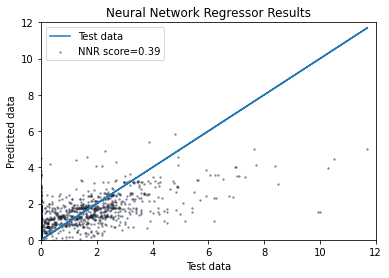

In [27]:
import matplotlib.pyplot as plt
# Plot the results
plt.figure()
s = 2
a = 0.4
plt.plot(y_test,y_test,label="Test data")
plt.scatter(y_test, test_pred, edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="NNR score=%.2f" % nlf.score(x_test, y_test))

plt.xlim([0, 12])
plt.ylim([0, 12])
plt.xlabel("Test data")
plt.ylabel("Predicted data")
plt.title("Neural Network Regressor Results")
plt.legend()
plt.show()